## Imports

In [1]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = ""

## Profiling with cProfile

### cProfile

In [4]:
! python -m cProfile -s cumulative sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

In [5]:
! python -m cProfile -o profile.stats sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

### snakeviz

In [6]:
! python -m snakeviz profile.stats --server

^C


![Screenshot 2025-01-23 114931.png](<attachment:Screenshot 2025-01-23 114931.png>)
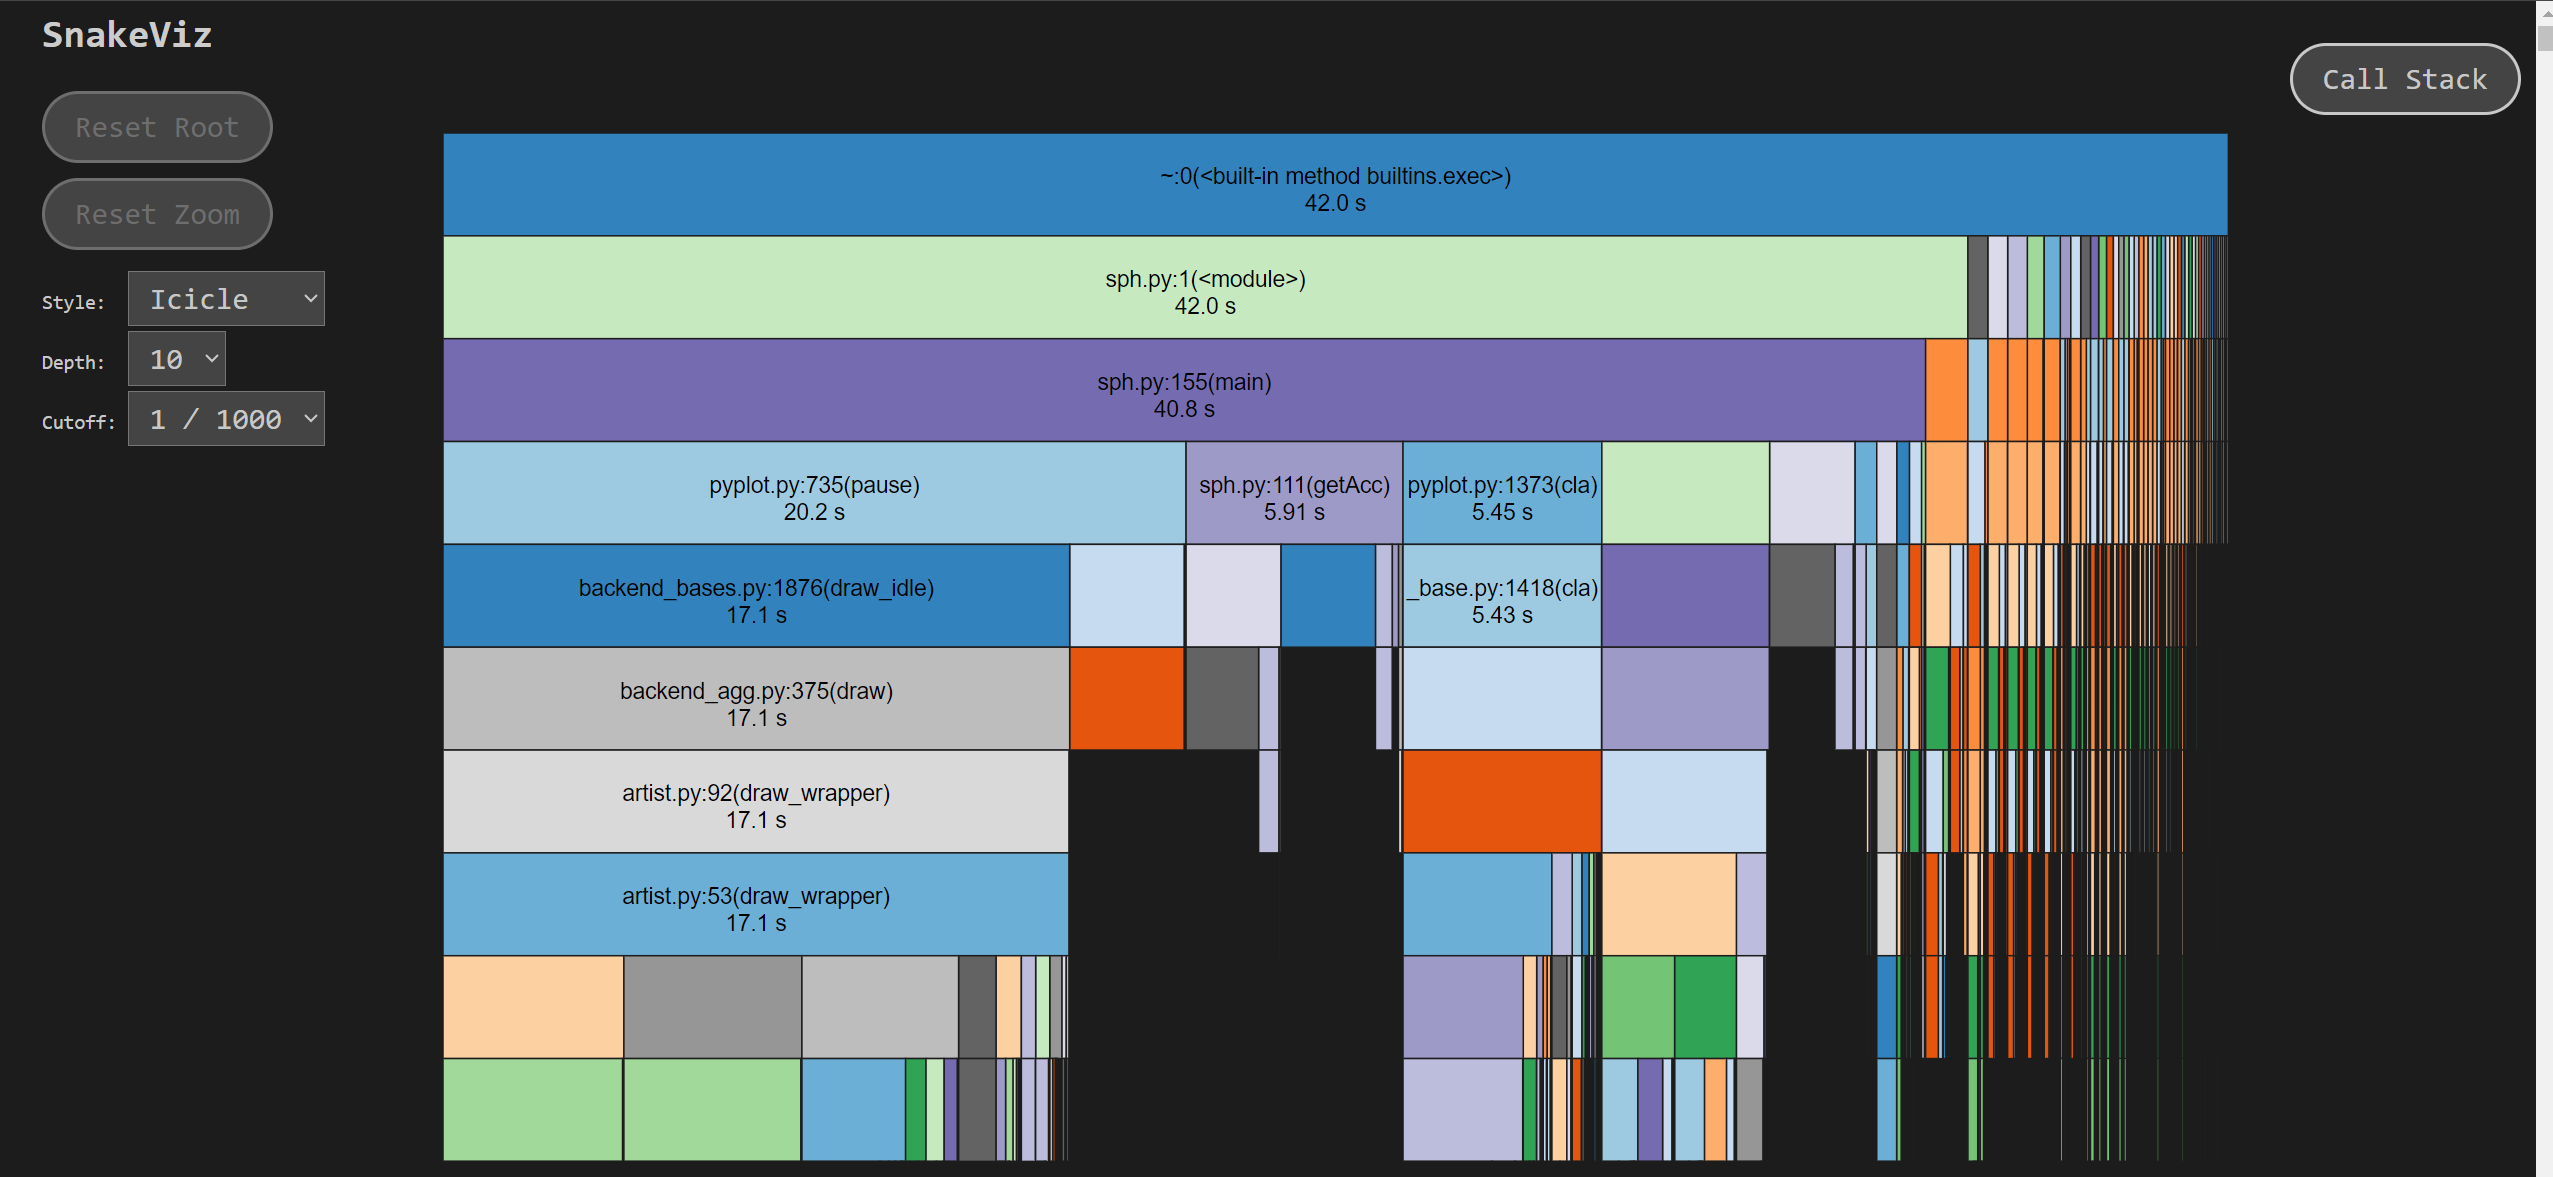

## Profiling with memory_profile

In [7]:
! python -m memory_profiler sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

In [8]:
! python -m mprof run sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)


In [9]:
! python -m mprof plot mprofile_20250123115442.dat

Figure(1260x540)


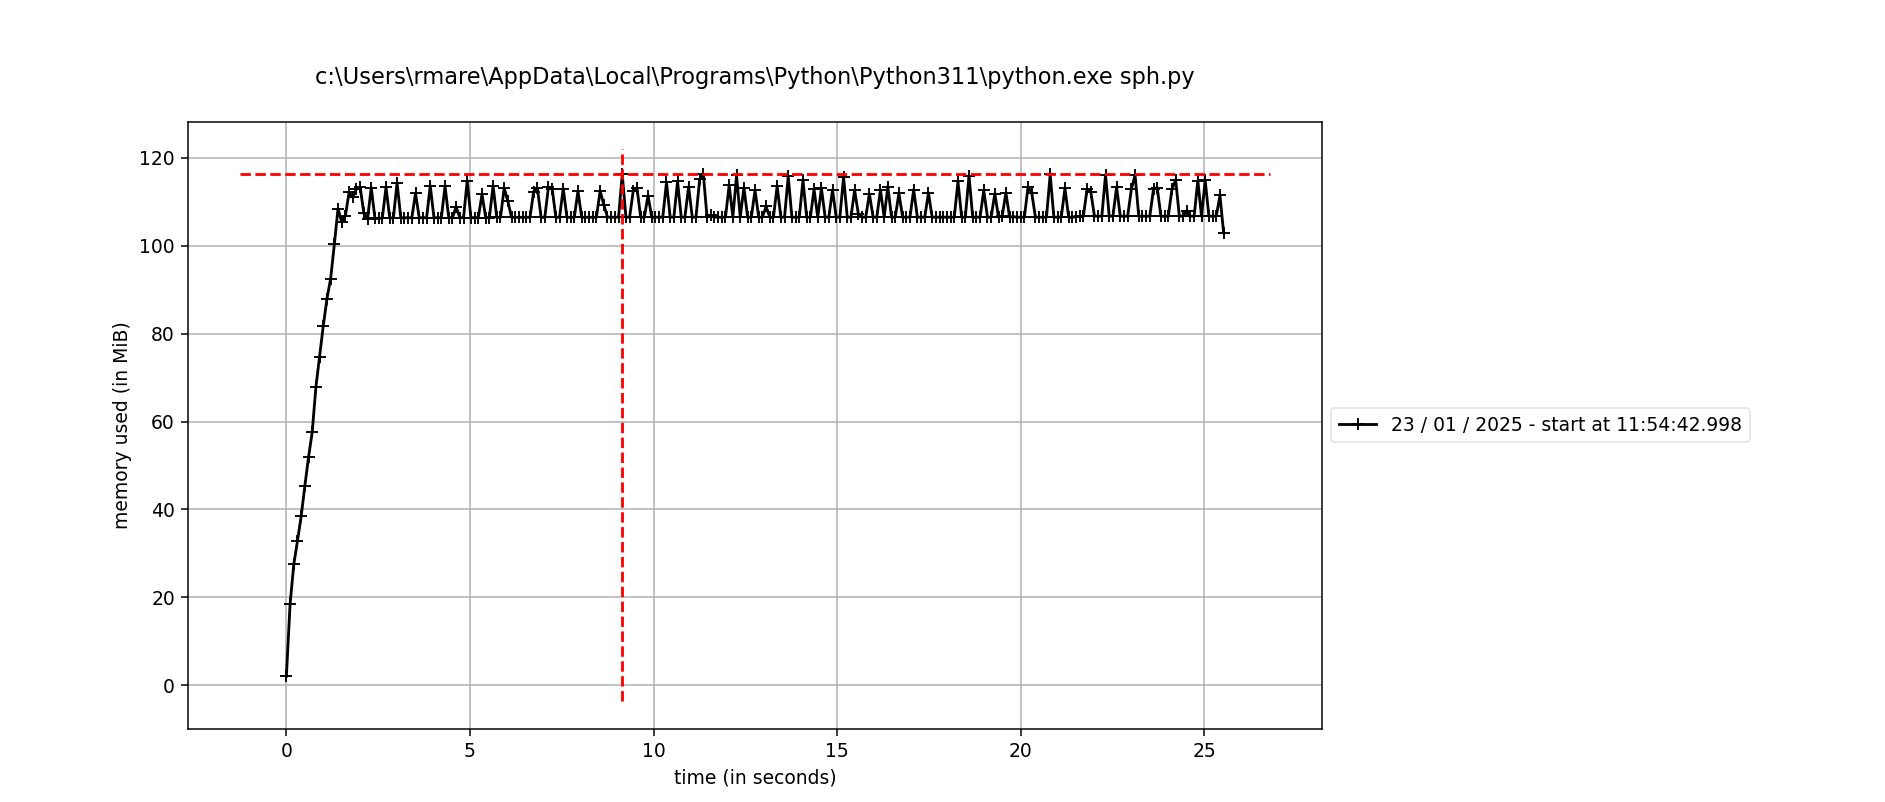

## Profiling with line_profiler

In [13]:
! python -m kernprof -l sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

In [14]:
! python -m line_profiler -rmt "sph.py.lprof"

Timer unit: 1e-06 s

